In [163]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection
import os
import mne

import sys
sys.path.append('../utils')
from nsl_wavelet_utils import *
from ERP_utils import *
import pickle

In [164]:
fs = 128
n_freqs = 128
frequencies = wavelet_freqs(fs, n_freqs)
pos = load_ep_info()

In [165]:
file = './nsl_30Hz/motor_nmus_post_sub1.mat'
data = loadmat(file)['spectrogram_matrix_sums']

In [166]:
data.shape

(407, 64, 128)

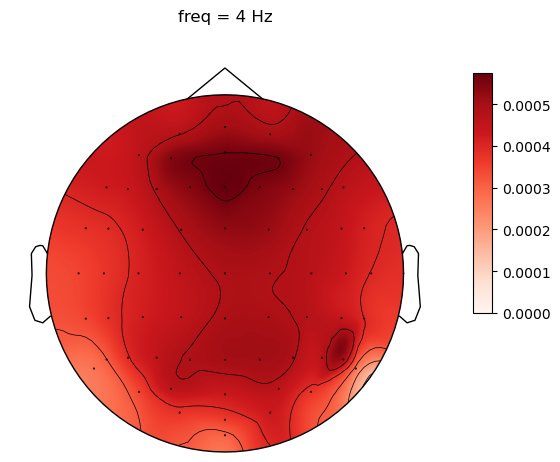

In [167]:

ch_idx = 47
freq_toplot = 4#Hz
freq_idx = time_index_custom([freq_toplot], frequencies)[0]

topo_toplot = np.mean(data[:,:, freq_idx], axis = 0)

fig, axes = plt.subplots()
cbar_ax = fig.add_axes([0.9,0.4,0.03,0.5])
clb = fig.colorbar(im, cax=cbar_ax)

axes.set_title(f'freq = {freq_toplot} Hz', pad = 20)
im, cn = mne.viz.plot_topomap(topo_toplot, pos, axes = axes)

